In [65]:
import kagglehub
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import sklearn.metrics
import sklearn.linear_model
import sklearn.model_selection
import sklearn.preprocessing

In [66]:
# Download latest Energy Fraud Detection version
path = kagglehub.dataset_download("taruneshburman/energy-fraud-detection")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\l.mora\.cache\kagglehub\datasets\taruneshburman\energy-fraud-detection\versions\1


In [67]:
data = pd.read_csv(f"{path}\\Energy_Fraud_Detection.csv", low_memory=False)

print(f"Column names:\n\t- {";\n\t- ".join(list(data.columns))}.")

Column names:
	- Customer_Type;
	- Average_Bill_Amount;
	- Meter_Readings_Deviation;
	- Billing_Cycle;
	- Historical_Consumption;
	- Meter_Type;
	- Tampering_Alerts;
	- Last_Inspection_Days;
	- Peak_Usage_Anomalies;
	- Complaints_Logged;
	- Fraud_Status.


In [68]:
train, test = sklearn.model_selection.train_test_split(data, test_size=.2, random_state=42, shuffle=True)

print(f"Number of columns:\t{len(train.columns)}")
print(f"Training set instances:\t{len(train)}")
print(f"Test set instances:\t{len(test)}")

Number of columns:	11
Training set instances:	800
Test set instances:	200


In [69]:
features = [
    # 'Customer_Type',
    'Average_Bill_Amount',
    'Meter_Readings_Deviation',
    # 'Billing_Cycle',
    'Historical_Consumption',
    # 'Meter_Type',
    # 'Tampering_Alerts',
    'Last_Inspection_Days',
    'Peak_Usage_Anomalies',
    # 'Complaints_Logged'
]
target = 'Fraud_Status'
target_labels = ['Confirmed Fraud', 'No Fraud', 'Potential Fraud']

print(f"Training features:\n\t- {";\n\t- ".join(features)}.")
print(f"Target variable:\n\t- {target}")

Training features:
	- Average_Bill_Amount;
	- Meter_Readings_Deviation;
	- Historical_Consumption;
	- Last_Inspection_Days;
	- Peak_Usage_Anomalies.
Target variable:
	- Fraud_Status


In [70]:
x_train = train[features].to_numpy()
y_train = train[target].astype("category")

x_test = test[features].to_numpy()
y_test = test[target].astype("category")

In [71]:
scaler = sklearn.preprocessing.StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)

In [72]:
clf = sklearn.linear_model.Perceptron(
    # loss="squared_hinge",
    max_iter=3000,
    random_state=42
)
fitted_clf = clf.fit(scaled_x_train, y_train)

In [73]:
y_pred = clf.predict(scaler.transform(x_test))
results = pd.DataFrame({"EXPECTED": y_test, "PREDICTED": y_pred})

In [74]:
results.head(60)

,EXPECTED,PREDICTED
521,No Fraud,No Fraud
737,Confirmed Fraud,Potential Fraud
740,No Fraud,Potential Fraud
660,No Fraud,Potential Fraud
411,Potential Fraud,Potential Fraud
678,Confirmed Fraud,Potential Fraud
626,Potential Fraud,Confirmed Fraud
513,Potential Fraud,Potential Fraud
859,Potential Fraud,Confirmed Fraud
136,Potential Fraud,Confirmed Fraud


In [75]:
clf.score(x_train, y_train)

0.34375

In [76]:
clf.score(x_test, y_test)

0.305

In [77]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

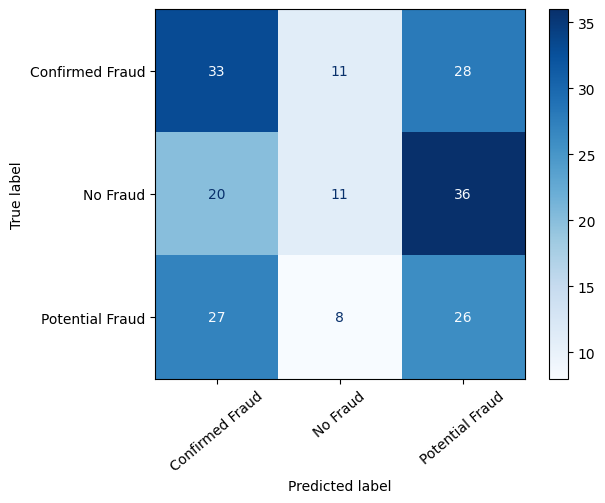

In [78]:
cm_display = sklearn.metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix,
    display_labels=target_labels)

cm_display.plot(
    cmap=plt.cm.Blues, # type: ignore
    xticks_rotation=40
)
plt.show()

In [79]:
avg_metrics = {
    "accuracy": sklearn.metrics.accuracy_score(y_test, y_pred),
    "precision": sklearn.metrics.precision_score(
        y_test, y_pred,
        labels=target_labels,
        average="weighted"),
    "sensitivity": sklearn.metrics.recall_score(
        y_test, y_pred,
        labels=target_labels,
        average="weighted"),
    "f1_score": sklearn.metrics.f1_score(
        y_test, y_pred,
        labels=target_labels,
        average="weighted")
}

In [80]:
avg_metrics

{'accuracy': 0.35,
 'precision': 0.35944444444444446,
 'sensitivity': 0.35,
 'f1_score': 0.3373282834997646}

In [81]:
print(sklearn.metrics.classification_report(y_test, y_pred, target_names=target_labels))

                 precision    recall  f1-score   support

Confirmed Fraud       0.41      0.46      0.43        72
       No Fraud       0.37      0.16      0.23        67
Potential Fraud       0.29      0.43      0.34        61

       accuracy                           0.35       200
      macro avg       0.36      0.35      0.34       200
   weighted avg       0.36      0.35      0.34       200

